In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, precision_score, classification_report, accuracy_score, ConfusionMatrixDisplay

In [87]:
df=pd.read_csv('fake_or_real_news.csv')
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [84]:
x = df['title']
y = df['label']

print(y.value_counts())
print('\n\n',y[:4])

REAL    3171
FAKE    3164
Name: label, dtype: int64


 0    FAKE
1    FAKE
2    REAL
3    FAKE
Name: label, dtype: object


In [85]:
y = y.apply(lambda x:1 if x=='FAKE' else 0).values
print('\n\n',y)



 [1 1 0 ... 1 0 0]


## Countvectorizer

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

count_model = CountVectorizer(stop_words='english')

# convert text to vectors
count_vec_train = count_model.fit_transform(X_train)
count_vec_test = count_model.transform(X_test)

# convert countvec class values to array
count_vec_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [103]:
print(count_model.get_feature_names_out()[200:300])

['92' '93' '95' '99' '9th' 'aap' 'abadi' 'abandon' 'abandoned' 'abandons'
 'abby' 'abc' 'abducts' 'abdullah' 'abedin' 'abilities' 'able' 'abnormal'
 'aboard' 'abolish' 'abortion' 'abridged' 'abroad' 'abrogation' 'absence'
 'absentee' 'absolutely' 'abstains' 'absurd' 'absurdly' 'abuse' 'abused'
 'abusing' 'abyss' 'aca' 'accept' 'acceptable' 'accepting' 'accepts'
 'access' 'accident' 'accidentally' 'accidents' 'accord' 'according'
 'account' 'accounting' 'accounts' 'accurate' 'accusations' 'accuse'
 'accused' 'accuser' 'accusers' 'accuses' 'acela' 'acheron' 'achievement'
 'achievements' 'ackbar' 'acknowledge' 'acknowledges' 'aclu' 'acquiring'
 'acquisition' 'acquittal' 'acquitted' 'acres' 'act' 'acted' 'acting'
 'action' 'actions' 'activation' 'active' 'activist' 'activists'
 'activities' 'activity' 'actor' 'actual' 'actually' 'acupuncture' 'ad'
 'adamantly' 'adams' 'adapt' 'add' 'added' 'adderall' 'addicting'
 'addiction' 'adding' 'address' 'addresses' 'adds' 'adelson' 'adequate'
 'adhd

The precision score is: 0.7782608695652173
The confusion matrix is:

[[539 102]
 [268 358]]
naive GaussianNB accuracy is  71.0 %


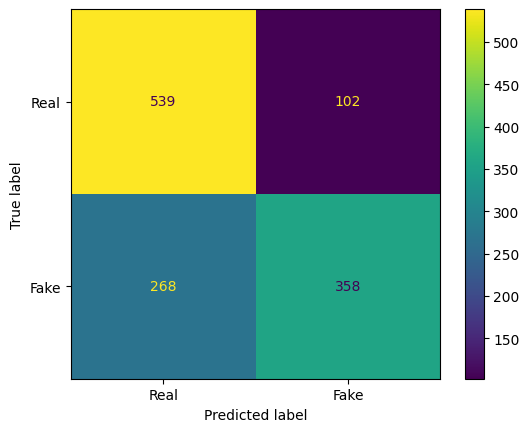

In [104]:
gnb_model = GaussianNB()

y_pred = gnb_model.fit(count_vec_train.toarray(), y_train).predict(count_vec_test.toarray())

print(f'The precision score is: {precision_score(y_test, y_pred)}')

print(f'The confusion matrix is:\n\n{confusion_matrix(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred, labels=gnb_model.classes_)
print("naive GaussianNB accuracy is ",round(accuracy_score(y_test,y_pred),2)*100,"%")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                          display_labels=['Real', 'Fake'])
disp.plot()
plt.show()

The precision score is: 0.8582230623818525
The confusion matrix is:

[[566  75]
 [172 454]]
naive bayes accuracy is  81.0 %


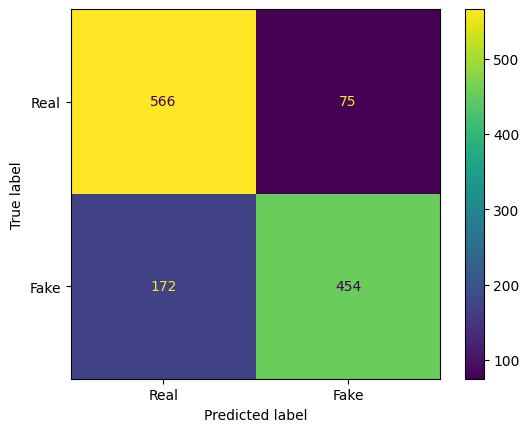

In [105]:
bnb_model = BernoulliNB()

y_pred = bnb_model.fit(count_vec_train.toarray(), y_train).predict(count_vec_test.toarray())

print(f'The precision score is: {precision_score(y_test, y_pred)}')

print(f'The confusion matrix is:\n\n{confusion_matrix(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred, labels=bnb_model.classes_)
print("naive bayes accuracy is ",round(accuracy_score(y_test,y_pred),2)*100,"%")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                          display_labels=['Real', 'Fake'])
disp.plot()
plt.show()

## TfidfVectorizer 

In [108]:
tf_model = TfidfVectorizer(stop_words='english')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

# convert text to vectors
tf_vec_train = tf_model.fit_transform(X_train)
tf_vec_test = tf_model.transform(X_test)

# convert countvec class values to array
tf_vec_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [109]:
print(tf_model.get_feature_names_out()[200:300])

['92' '93' '95' '99' '9th' 'aap' 'abadi' 'abandon' 'abandoned' 'abandons'
 'abby' 'abc' 'abducts' 'abdullah' 'abedin' 'abilities' 'able' 'abnormal'
 'aboard' 'abolish' 'abortion' 'abridged' 'abroad' 'abrogation' 'absence'
 'absentee' 'absolutely' 'abstains' 'absurd' 'absurdly' 'abuse' 'abused'
 'abusing' 'abyss' 'aca' 'accept' 'acceptable' 'accepting' 'accepts'
 'access' 'accident' 'accidentally' 'accidents' 'accord' 'according'
 'account' 'accounting' 'accounts' 'accurate' 'accusations' 'accuse'
 'accused' 'accuser' 'accusers' 'accuses' 'acela' 'acheron' 'achievement'
 'achievements' 'ackbar' 'acknowledge' 'acknowledges' 'aclu' 'acquiring'
 'acquisition' 'acquittal' 'acquitted' 'acres' 'act' 'acted' 'acting'
 'action' 'actions' 'activation' 'active' 'activist' 'activists'
 'activities' 'activity' 'actor' 'actual' 'actually' 'acupuncture' 'ad'
 'adamantly' 'adams' 'adapt' 'add' 'added' 'adderall' 'addicting'
 'addiction' 'adding' 'address' 'addresses' 'adds' 'adelson' 'adequate'
 'adhd

The precision score is: 0.74
The confusion matrix is:

[[511 130]
 [256 370]]
naive GaussianNB accuracy is  70.0 %


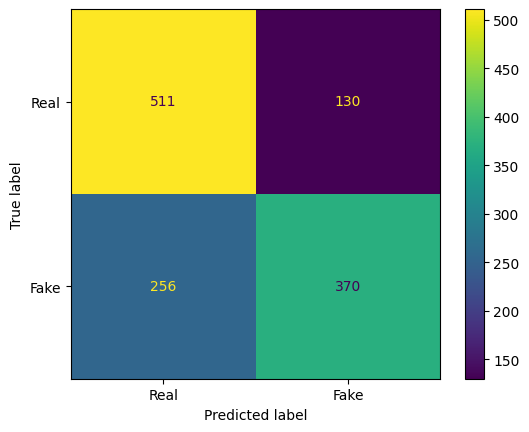

In [110]:
gnb_model = GaussianNB()

y_pred = gnb_model.fit(tf_vec_train.toarray(), y_train).predict(tf_vec_test.toarray())

print(f'The precision score is: {precision_score(y_test, y_pred)}')

print(f'The confusion matrix is:\n\n{confusion_matrix(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred, labels=gnb_model.classes_)
print("naive GaussianNB accuracy is ",round(accuracy_score(y_test,y_pred),2)*100,"%")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                          display_labels=['Real', 'Fake'])
disp.plot()
plt.show()

The precision score is: 0.8582230623818525
The confusion matrix is:

[[566  75]
 [172 454]]
naive bayes accuracy is  81.0 %


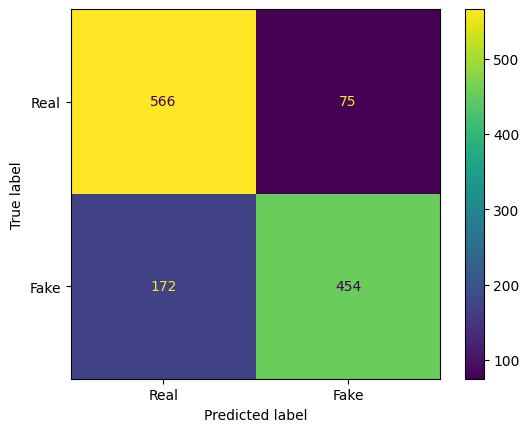

In [122]:
bnb_model = BernoulliNB()

y_pred = bnb_model.fit(tf_vec_train.toarray(), y_train).predict(tf_vec_test.toarray())

print(f'The precision score is: {precision_score(y_test, y_pred)}')

print(f'The confusion matrix is:\n\n{confusion_matrix(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred, labels=bnb_model.classes_)
print("naive bayes accuracy is ",round(accuracy_score(y_test,y_pred),2)*100,"%")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                          display_labels=['Real', 'Fake'])
disp.plot()
plt.show()

### Comparing the two vectorization methods: countvectorizer and tfidf

In [114]:
count_df = pd.DataFrame(count_vec_train.A, columns=count_model.get_feature_names_out())

tfidf_df = pd.DataFrame(tf_vec_train.A, columns=tf_model.get_feature_names_out())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

set()
False
